# Literature Counts

This notebook uses automated literature searches to collect co-occurence data for the aperiodic-clinical project. 

Tools:
- literature searches and analyses are done with the [lisc](https://lisc-tools.github.io/lisc/) module

In [1]:
# Import LISC code
from lisc import Counts
from lisc.plts.counts import plot_matrix

In [2]:
# Import local code
from local.terms import TERMS

In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Data collection settings
RUN_COLLECTION = True

In [5]:
# Settings for literature collection
db = 'pubmed'

## Counts - Clinical

Count the co-occurence between aperiodic measure related terms and general clinical terms.

In [6]:
# Initialize counts object
counts = Counts()

In [7]:
# Add association terms to the LISC object
counts.add_terms(TERMS['AP'], dim='A')
counts.add_terms(TERMS['CLINICAL'], dim='B')

In [8]:
# Check terms - A
counts.terms['A'].check_terms()

List of terms used: 

aperiodic exponent  : aperiodic exponent, spectral slope, 1/f slope, 1/f exponent


In [9]:
# Check terms - B
counts.terms['B'].check_terms()

List of terms used: 

clinical   : clinical
disorder   : disorder, disease
biomarker  : biomarker
diagnosis  : diagnosis, diagnostic
treatment  : treatment


In [10]:
# Run the data collection
if RUN_COLLECTION:
    counts.run_collection(db=db)

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


### Check Collection

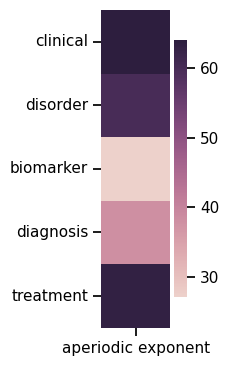

In [11]:
# Check the results of the link
plot_matrix(counts.counts.T,
            counts.terms['A'].labels,
            counts.terms['B'].labels, 
            figsize=(2.5, 4))

## Counts - Disorders

Count the co-occurence between aperiodic measure related terms and disorder related terms.

In [12]:
# Initialize counts object
counts = Counts()

In [13]:
# Add association terms to the LISC object
counts.add_terms(TERMS['AP'], dim='A')
counts.add_terms(TERMS['DISORDERS'], dim='B')

In [14]:
# Check terms - A
counts.terms['A'].check_terms()

List of terms used: 

aperiodic exponent  : aperiodic exponent, spectral slope, 1/f slope, 1/f exponent


In [15]:
# Check terms - B
counts.terms['B'].check_terms()

List of terms used: 

parkinson's                  : parkinson's
epilepsy                     : epilepsy, seizure
adhd                         : adhd, attention deficit hyperactivity disorder
autism                       : autism
alzheimers                   : alzheimers, dementia
disorders of consciousness   : disorders of consciousness, coma
depression                   : depression, MDD, major depressive disorder
schizophrenia                : schizophrenia
stroke                       : stroke
tbi                          : tbi, traumatic brain injury
dyslexia                     : dyslexia
dystonia                     : dystonia
glioma                       : glioma
huntington's                 : huntington's
multiple sclerosis           : multiple sclerosis
ptsd                         : ptsd, post traumatic stress disorder
REM sleep behavior disorder  : REM sleep behavior disorder
rett syndrome                : rett syndrome
ALS                          : ALS, amyotrophic latera

In [16]:
# Run the data collection
if RUN_COLLECTION:
    counts.run_collection(db=db)

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


### Check Collection

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/lisc/plts/counts.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


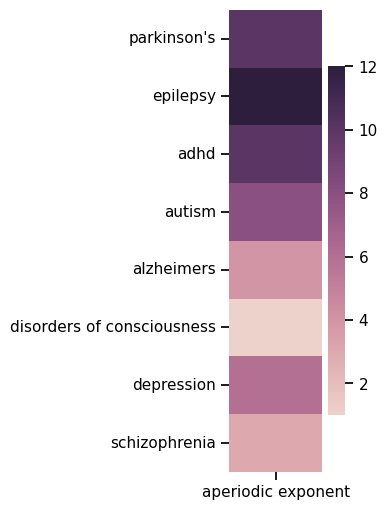

In [17]:
# Plot the collected data results - top disorders
plot_matrix(counts.counts.T[:8],
            counts.terms['A'].labels,
            counts.terms['B'].labels[:8], 
            figsize=(1.5, 6))

/Users/tom/opt/anaconda3/lib/python3.8/site-packages/lisc/plts/counts.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


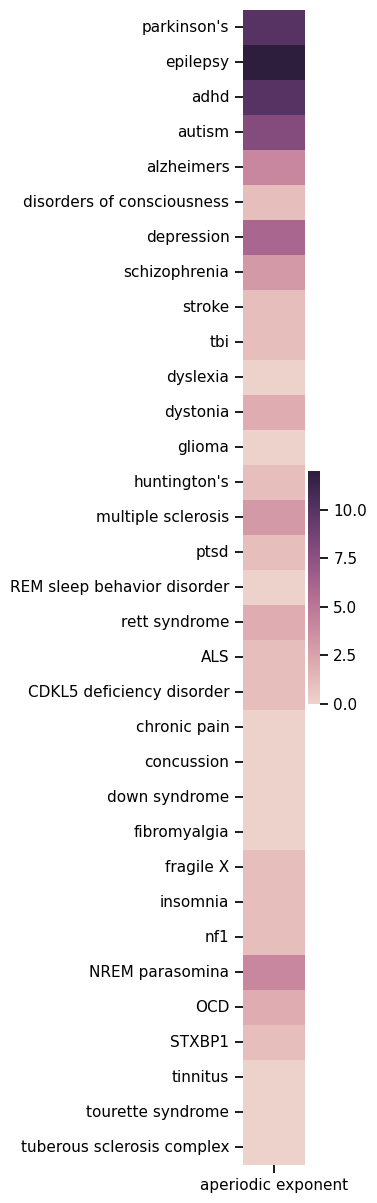

In [18]:
# Plot the collected data results - all disorders
plot_matrix(counts.counts.T,
            counts.terms['A'].labels,
            counts.terms['B'].labels, 
            figsize=(1, 15))